#Contents of the Notebook:
  **Part1: Exploratory Data Analysis(EDA):**

  1)Analysis of the features.

  2)Finding any relations or trends considering multiple features.

  **Part2: Feature Engineering and Data Cleaning:**

  1)Adding any few features.

  2)Removing redundant features.

  3)Converting features into suitable form for modeling.

  **Part3: Predictive Modeling**

  1)Running Basic Algorithms.

  2)Cross Validation.

  3)Ensembling.

  4)Important Features Extraction.
  
  **Part4: Model Training Pipeline**

  1)Set the pipeline

  2)Set the parameter of GridResearch

  3)Evaluate the best model

  4)Model Explanation

In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 12.8 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, make_scorer, precision_recall_curve, auc, roc_auc_score
%matplotlib inline
rcParams['figure.figsize'] = 8, 10
sns.set_style('whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Part 1: EDA

In [3]:
# Load data
data = pd.read_csv('/content/drive/My Drive/Apziva/term-deposit-marketing-2020.csv')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


There is not null value.

In [ ]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


<Axes: xlabel='y', ylabel='count'>

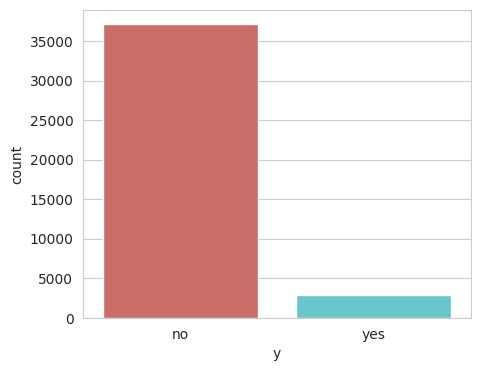

In [ ]:
# Univariate analysis of target variable
# Subsription Status Visulization

sns.countplot(x='y', hue='y', data=data, palette='hls', legend=False)

From the plot we can tell, the customer did not subsribed the term deposit as the majority class.

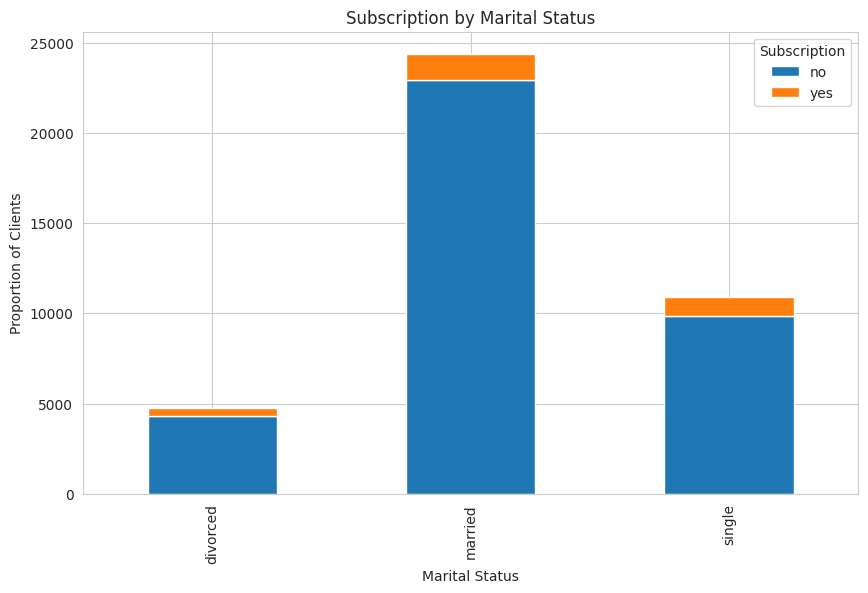

In [ ]:
# Subscrption rate by marital Status

sub_by_marital = data.groupby('marital')[['y']].value_counts().reset_index(name='count')
sub_by_marital = sub_by_marital.pivot_table(index='marital', columns=['y'], values='count', fill_value=0)

sub_by_marital.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Marital Status')
plt.ylabel('Proportion of Clients')
plt.title('Subscription by Marital Status')
_ = plt.legend(title='Subscription')

People were married got relevant higher rate for subscription of the deposite term.

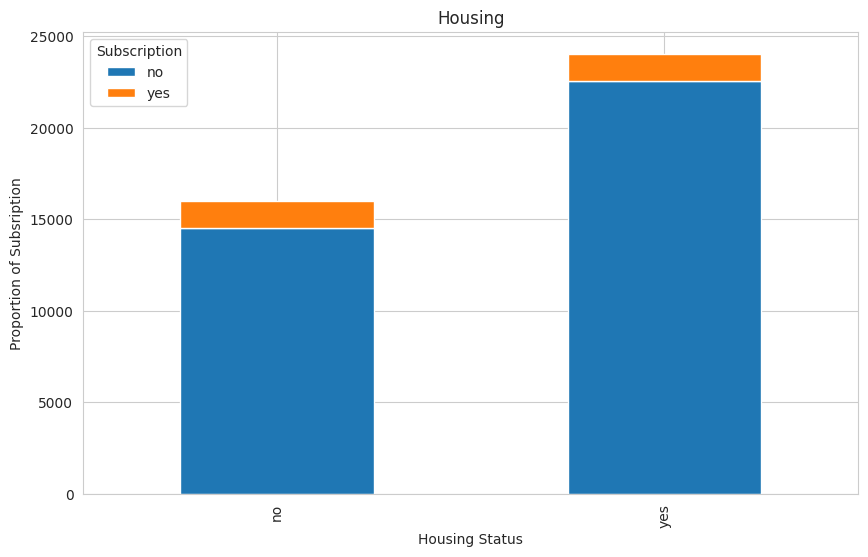

In [ ]:
# Sbscription rate by housing status

sub_by_house = data.groupby('housing')[['y']].value_counts().reset_index(name='count')
sub_by_house = sub_by_house.pivot_table(index='housing', columns=['y'], values='count', fill_value=0)

sub_by_house.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Housing Status')
plt.ylabel('Proportion of Subsription')
plt.title('Housing')
_ = plt.legend(title='Subscription')

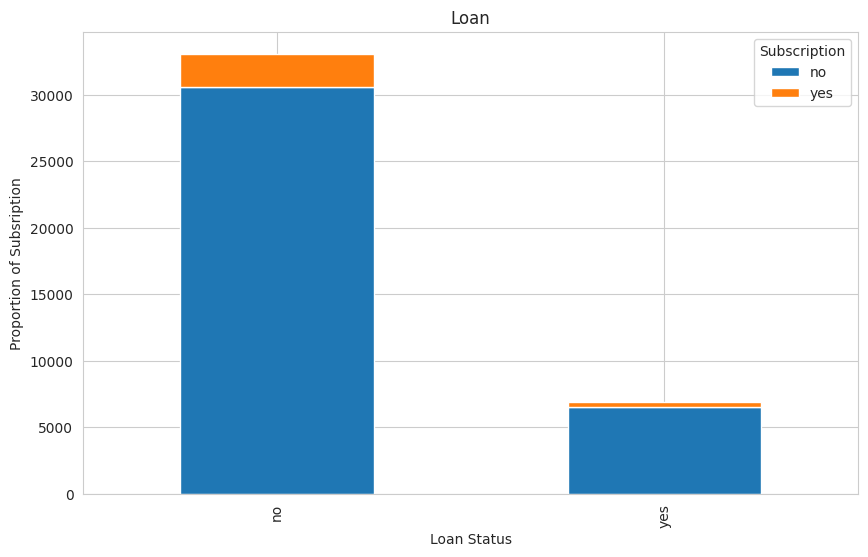

In [ ]:
# Subscription rate by loan status

sub_by_loan = data.groupby('loan')[['y']].value_counts().reset_index(name='count')
sub_by_loan = sub_by_loan.pivot_table(index='loan', columns=['y'], values='count', fill_value=0)

sub_by_loan.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Loan Status')
plt.ylabel('Proportion of Subsription')
plt.title('Loan')
_ = plt.legend(title='Subscription')

Customer without loan payment prefer subscribe the deposite term.

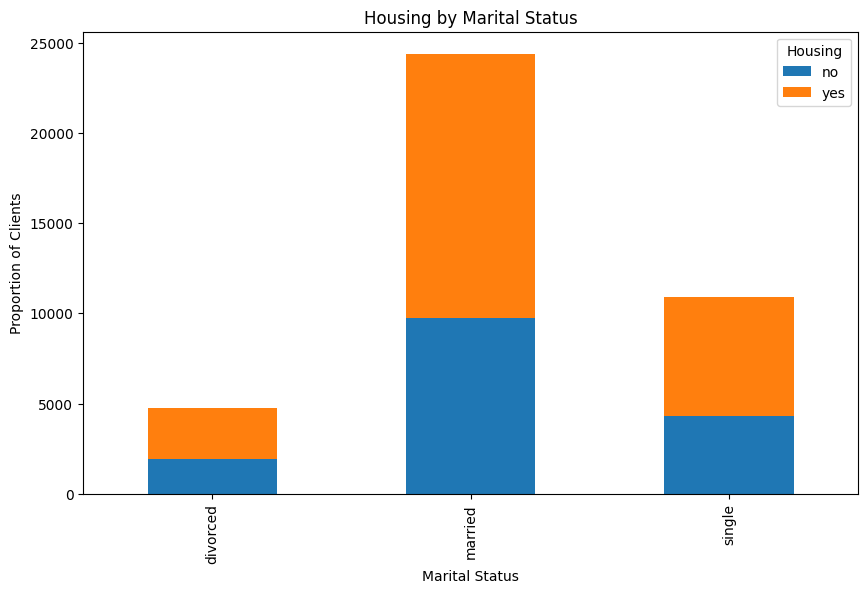

In [ ]:
# Housing by Marital Status

house_by_marital = data.groupby('marital')[['housing']].value_counts().reset_index(name='count')
house_by_marital = house_by_marital.pivot_table(index='marital', columns=['housing'], values='count', fill_value=0)

house_by_marital.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Marital Status')
plt.ylabel('Proportion of Clients')
plt.title('Housing by Marital Status')
_ = plt.legend(title='Housing')

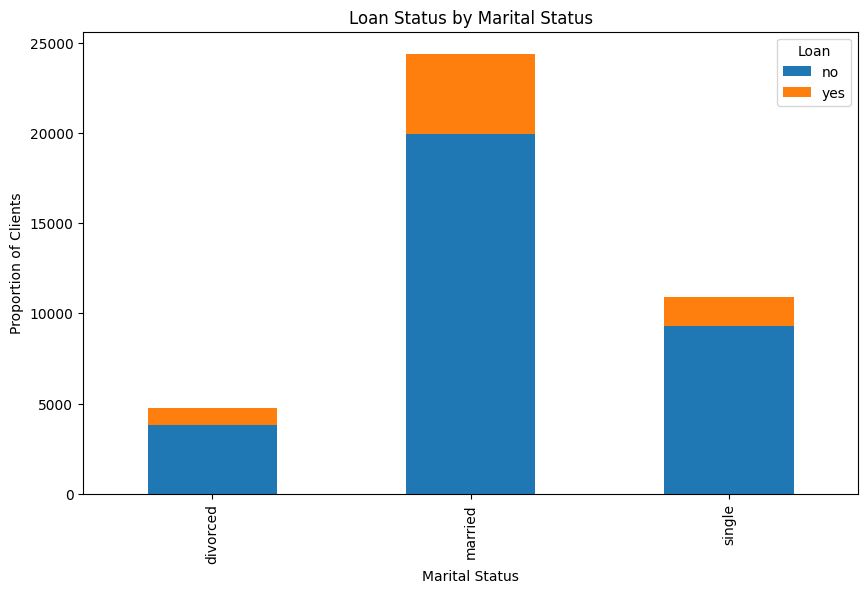

In [ ]:
# Loan Status by Marital Status

loan_by_marital = data.groupby('marital')[['loan']].value_counts().reset_index(name='count')
loan_by_marital = loan_by_marital.pivot_table(index='marital', columns=['loan'], values='count', fill_value=0)

loan_by_marital.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Marital Status')
plt.ylabel('Proportion of Clients')
plt.title('Loan Status by Marital Status')
_ = plt.legend(title='Loan')

In [ ]:
# The frequency of each education level of subscription

pd.crosstab(data.education,data.y,margins=True).style.background_gradient(cmap='summer_r')

y,no,yes,All
education,,,
primary,5917,353,6270
secondary,19575,1418,20993
tertiary,10177,1029,11206
unknown,1435,96,1531
All,37104,2896,40000


The customers in secondary and teriary education level have higher possibility to subscribe the term deposit.

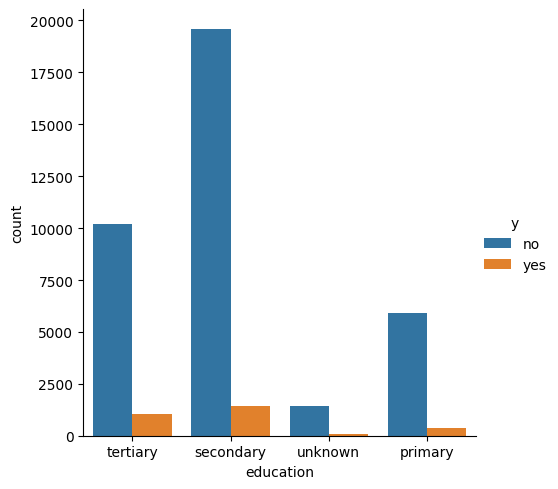

In [ ]:
# The subscription frequency plot by education

sns.catplot(x="education", kind="count",hue = 'y', data=data)
plt.show()

In [ ]:
# The sunscrition frequency by occupation

pd.crosstab(data.job,data.y,margins=True).style.background_gradient(cmap='summer_r')

y,no,yes,All
job,,,
admin,4132,351,4483
blue-collar,8848,535,9383
entrepreneur,1317,88,1405
housemaid,1034,53,1087
management,7490,676,8166
retired,1286,151,1437
self-employed,1302,112,1414
services,3672,238,3910
student,442,82,524


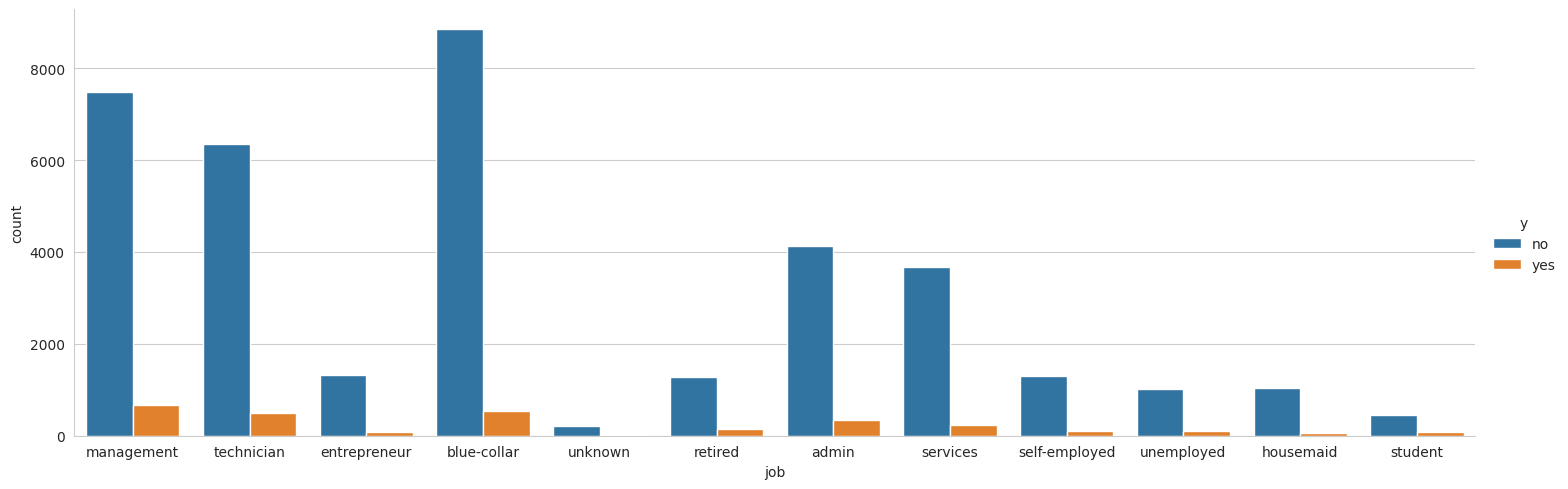

In [ ]:
# Compare the frequency of subscription by different occupations

sns.catplot(x='job', kind='count',hue = 'y', data=data, height=5, aspect=3)
plt.show()

Customers occupation in management, technician, and blue-colar have higher possibility to subscribe the term deposite.

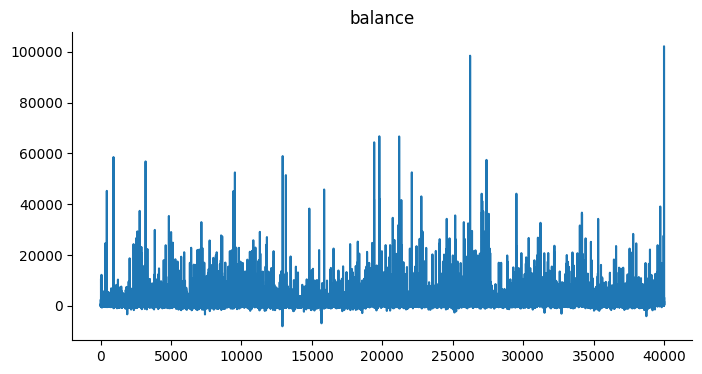

In [ ]:
# Overall average balance distribution

data['balance'].plot(kind='line', figsize=(8, 4), title='balance')
plt.gca().spines[['top', 'right']].set_visible(False)

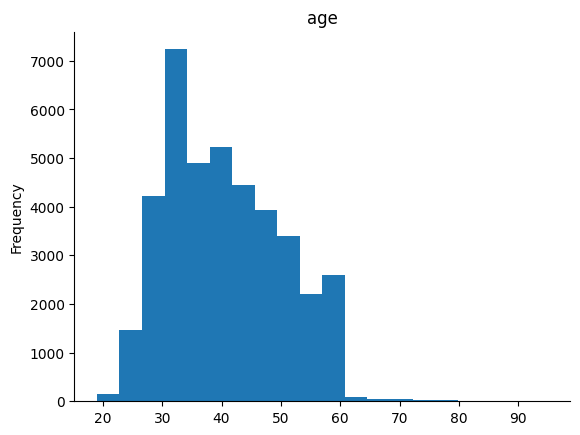

In [ ]:
# age plot

data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

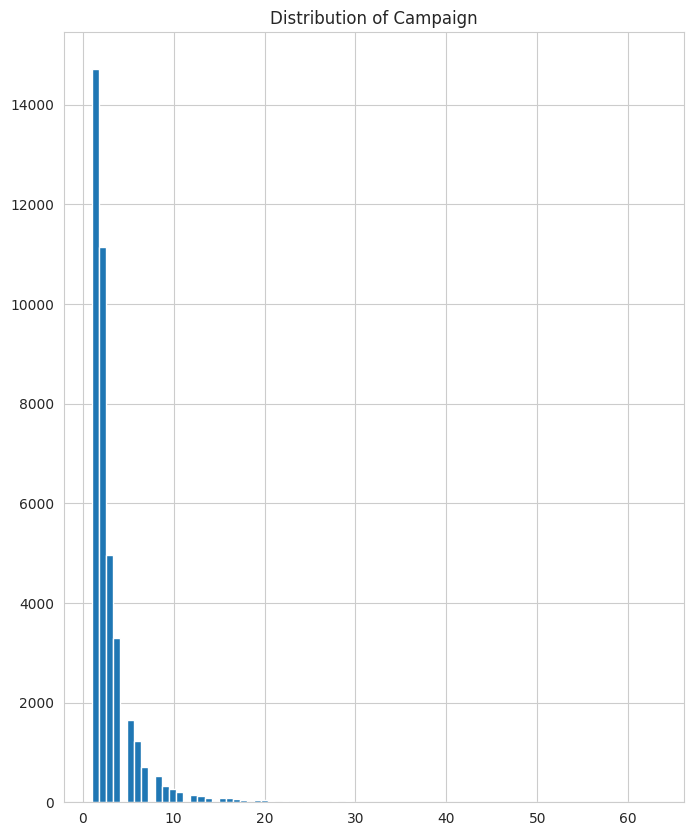

In [ ]:
# Distribution of campaign

plt.hist(data['campaign'], bins=80);
plt.title('Distribution of Campaign');

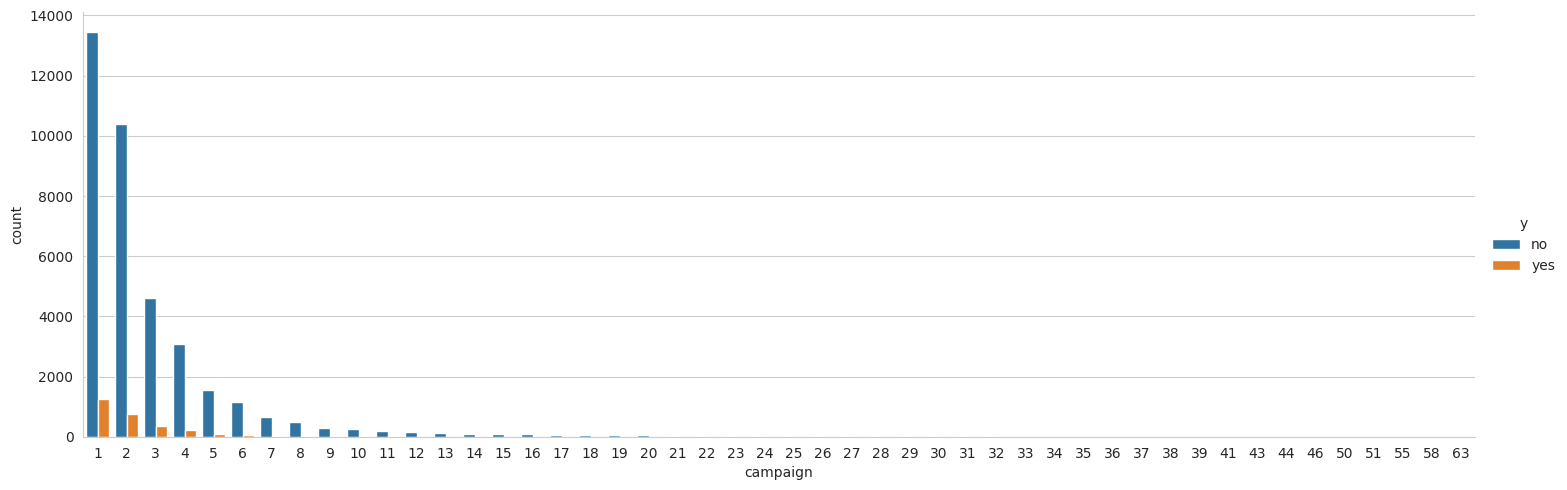

In [ ]:
sns.catplot(x="campaign", kind="count",hue = 'y', data=data, height=5, aspect=3)
plt.show()

<Axes: xlabel='campaign', ylabel='y'>

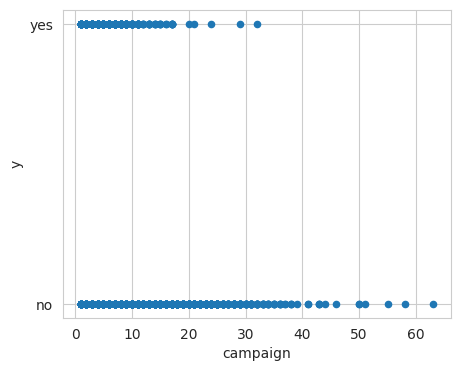

In [ ]:
# Distribution plot of subscription by campaign

data.plot(kind='scatter', x='campaign', y='y')

##Part2: Feature Engineering and Data Cleaning:

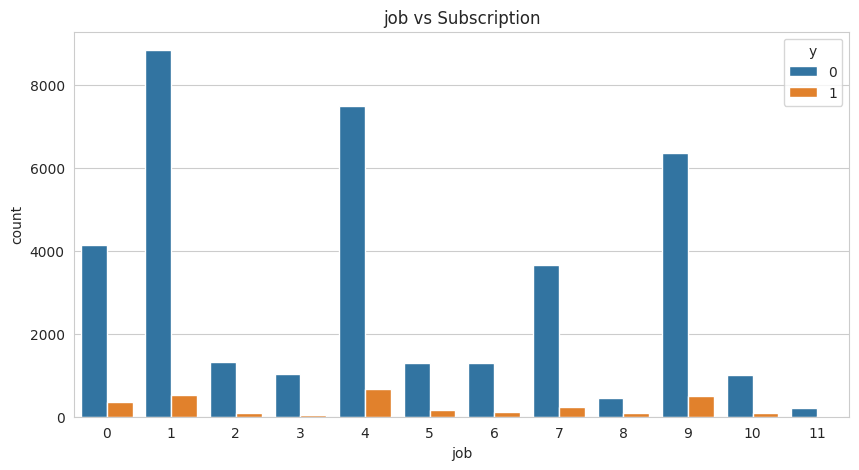

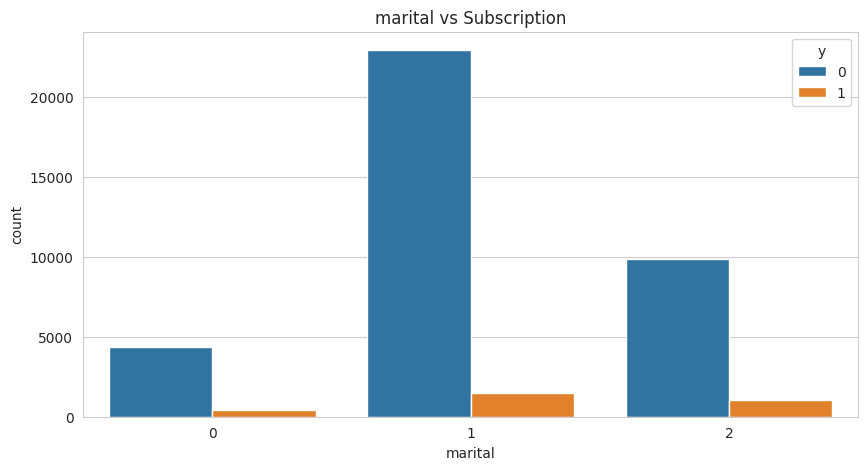

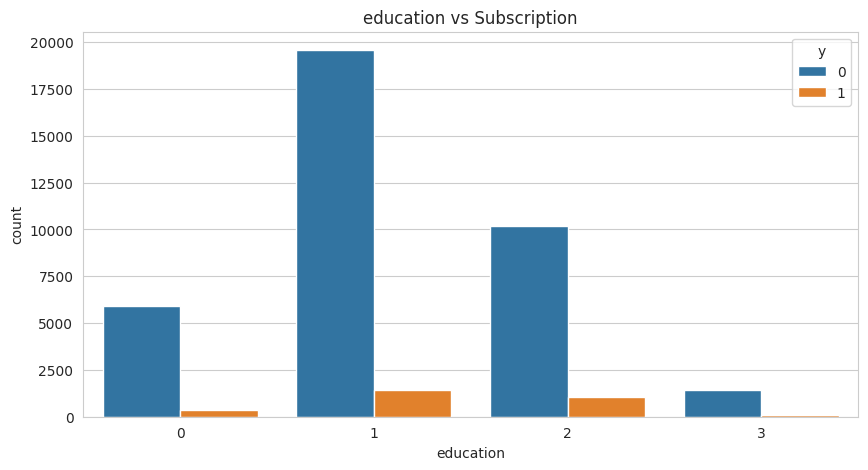

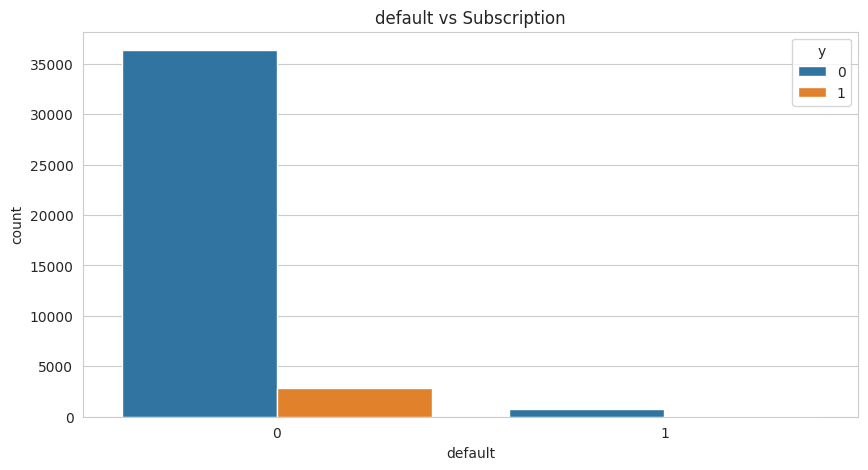

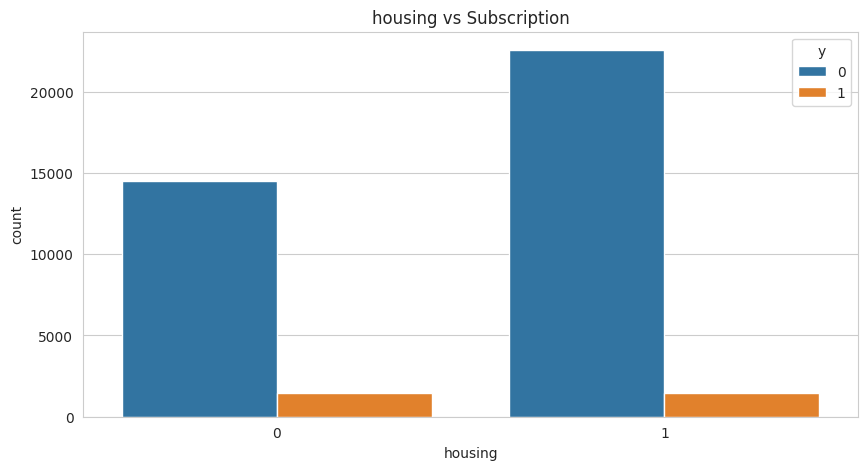

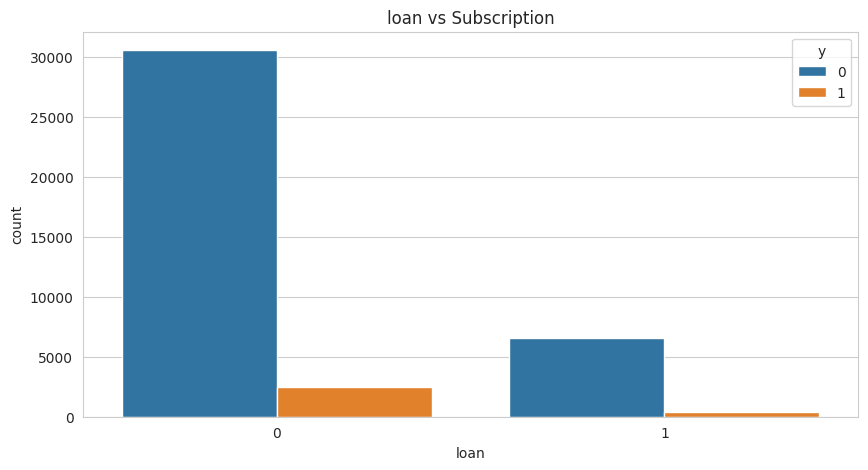

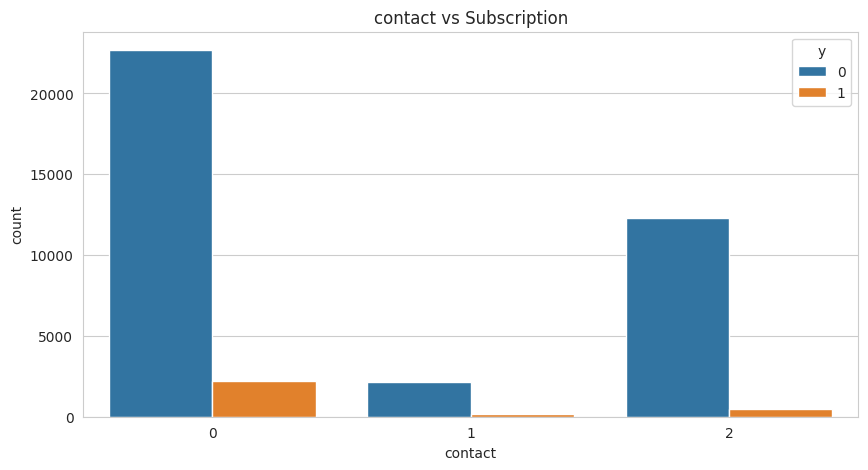

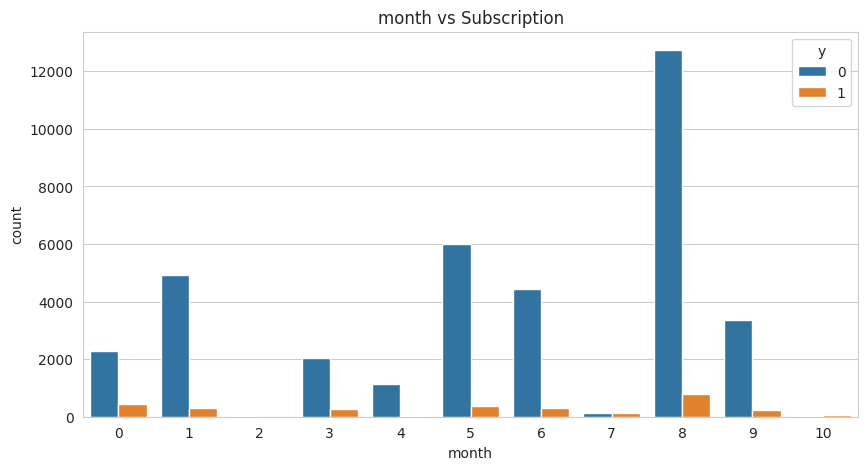

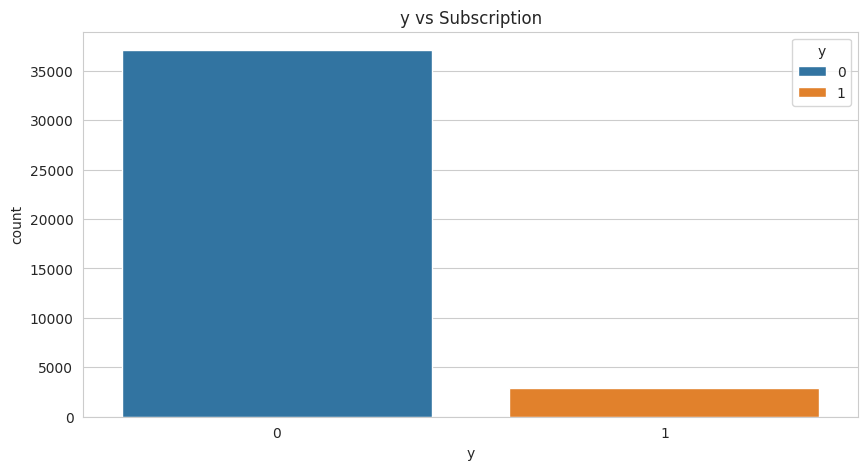

In [ ]:
# Visulaized the categorical feature with target variable y

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f'{feature} vs Subscription')
    plt.show()

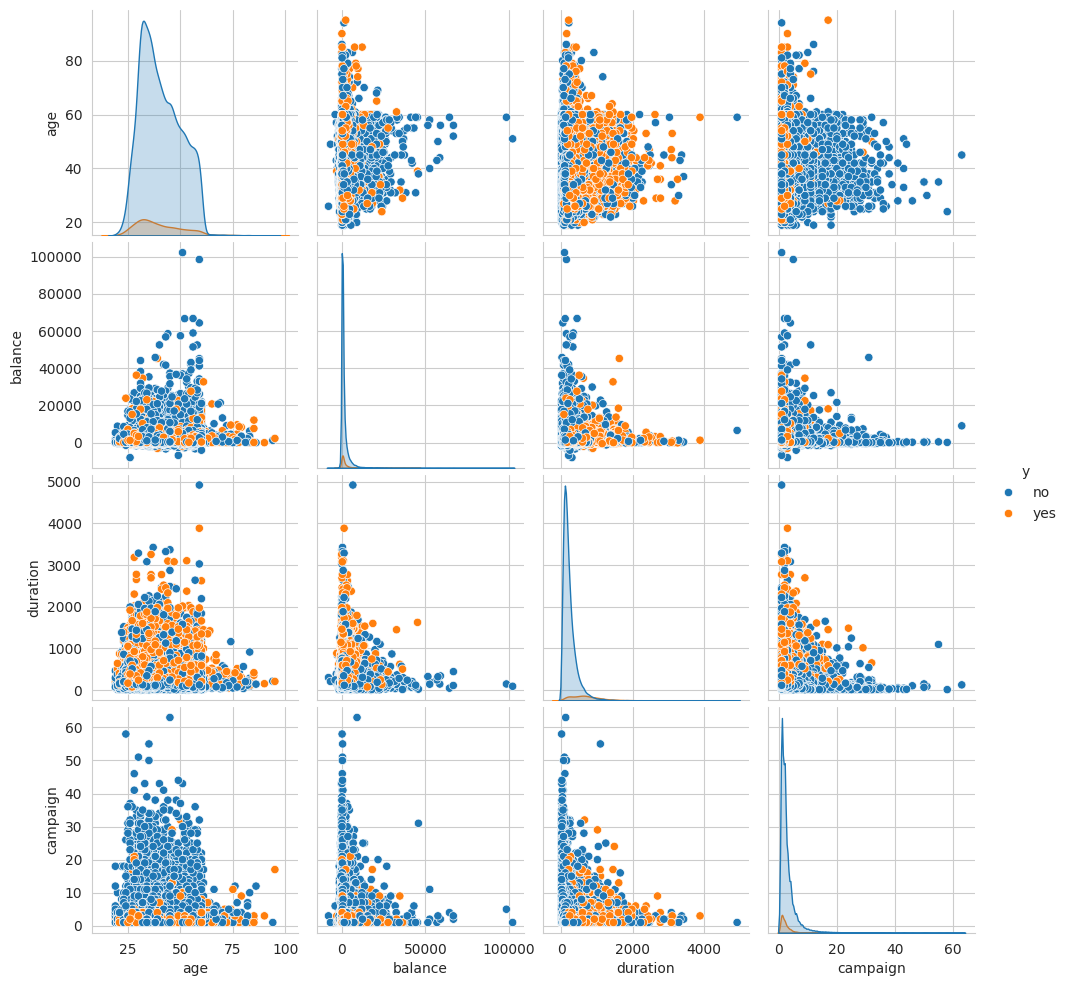

In [ ]:
# Pair plot for selected numeric features
selected_features = ['age', 'balance', 'duration', 'campaign']
sns.pairplot(data[selected_features + ['y']], hue='y')
plt.show()

In [8]:
# Convert the categorical features into numerical format for modeling

from sklearn.preprocessing import LabelEncoder

# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']

# Initialize the LabelEncoder
label_encoders = {}

# Loop through each categorical feature and apply LabelEncoder
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

# Now, df contains categorical features converted to integer labels
print(data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  y  
0    5      8       261         1  0  
1    5      8       151         1  0  
2    5      8        76         1  0  
3    5      8        92         1  0  
4    5      8       198         1  0  


In [9]:
# Define features (x) and target (y)
x = data.drop('y', axis=1)
y = data['y']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=10)
x_feature = selector.fit_transform(x, y)

# Get selected feature names
selected_features = x.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign'],
      dtype='object')


In this step can reduce the dimensionality of the dataset by selecting the most informative features that contribute to the classification task. The result shows age, marital status, education, account balance, housing are the top 5 features will be used in predicted the target variable.

In [ ]:
x_feature = pd.DataFrame(x_feature, columns=selected_features)
x_feature.head()
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,4,1,2,0,2143,1,0,2,5,8,261,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1
3,47,1,1,3,0,1506,1,0,2,5,8,92,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1


##Part3: Predictive Modeling

In [ ]:
!pip install lightgbm --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.4.0
    Uninstalling lightgbm-4.4.0:
      Successfully uninstalled lightgbm-4.4.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_feature, y, test_size=0.2, random_state=42, stratify=y)

# Using K-fold method to split and evaluate the model
# Create the StratifiedKFold cross-validator
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_feature)
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Applied LGBMClassifier as the training model
model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    metric='binary_logloss',
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    random_state=42
)

# Fit the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Evaluate the model using different metrics

classification_rep = classification_report(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

[LightGBM] [Info] Number of positive: 2317, number of negative: 29683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072406 -> initscore=-2.550301
[LightGBM] [Info] Start training from score -2.550301
Precision: 0.61
Recall: 0.38
F1-Score: 0.47
AUC-ROC: 0.94

Confusion Matrix:
[[7279  142]
 [ 359  220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7421
           1       0.61      0.38      0.47       579

    accuracy                           0.94      8000
   macro avg       0.78      0.68      0.72      8000
weighted avg       0.93      0.94      0.93 

Class 0 (Majority Class Customer not subscribe the term deposit):

  -Precision: 0.95, meaning 95% of the predicted negatives are correct.

  -Recall: 0.98, meaning 98% of the actual negatives are correctly identified.

  -F1-Score: 0.97, indicating very high performance on the majority class.

Class 1 (Minority Class Customer subscribe the term deposit):

  -Precision: 0.61, it is correct 61% of the time to predict the positive.

  -Recall: 0.38, reflecting poor sensitivity in detecting actual positives.

  -F1-Score: 0.47, showing overall difficulty in handling the minority class.

Accuracy: 0.94, reflecting overall correctness, but heavily influenced by the majority class.
Macro Avg: Averages metrics across classes, indicating a significant drop in performance for class 1.
Weighted Avg: Accounts for the imbalance by weighting classes according to their frequency, leading to an overall positive evaluation influenced by the well-performing majority class.

The model performs very well on the customers do not subscribe the term deposit, but struggles significantly with the customers will subscribe the term deposit.

The high AUC-ROC indicates that the model is generally good at ranking positive and negative instances, but the low recall and F1-score for class 1 indicate that it is not effective at correctly identifying the minority class.

The confusion matrix highlights the issue with false negatives for class 1, where the model misses a substantial portion of actual positives.

##Part 4: Model Training Pipeline

In [10]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.0 MB/s eta 0:00:00


In [13]:
pip install imblearn

In [15]:
import shap
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [16]:
# Define the pipeline with feature selection, resampling, and model training
pipeline = ImbPipeline([
    ('feature_selection', SelectKBest()),
    ('sampling', SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    # Feature selection techniques
    'feature_selection': [
        SelectKBest(k=10),
        RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    ],

    # Resampling techniques
    'sampling': [
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42)
    ],

    # Model training with hyperparameters
    'model': [
        # Random Forest
        RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5),
        RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10),

        # LightGBM
        lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1),
        lgb.LGBMClassifier(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=-1),

        # XGBoost
        xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss'),
        xgb.XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=7, use_label_encoder=False, eval_metric='logloss')
    ]
}

# Set up cross-validation scheme
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to search for the best combination of techniques
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best combination of techniques
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1 score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 29683, number of negative: 29683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 59366, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters found:  {'feature_selection': RFE(estimator=RandomForestClassifier(), n_features_to_select=10), 'model': LGBMClassifier(learning_rate=0.05, n_estimators=200, random_state=42), 'sampling': SMOTE(random_state=42)}
Best cross-validation F1 score:  0.5005768957971746
              precision    recall  f1-score   support

           0       0.98      0.92      0.94      7421
           1       0.40      0.72      0.51    

F1-Score: 0.51: The F1-score for class 1 (customer would subscribe the term deposit) reflects the trade-off between precision and recall. A score of 0.51 indicates that, while the model does a decent job in identifying true positives, the precision issues reduce the overall effectiveness of class 1 predictions.

In [21]:
# Use SHAP to explain the best model's predictions

# Create a SHAP explainer for the non-linear model
explainer = shap.TreeExplainer(best_model.named_steps['model'])

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Visualize SHAP values

# Summary plot for global feature importance
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

# Dependence plot for an individual feature
# Replace 'feature_index' with the index or name of the feature you want to analyze
shap.dependence_plot('feature_index', shap_values, X_test)

# Force plot for individual predictions (only for single predictions or small samples)
# Uncomment to use for specific instances
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

LightGBMError: The number of features in data (13) is not the same as it was in training data (10).
You can set ``predict_disable_shape_check=true`` to discard this error, but please be aware what you are doing.

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


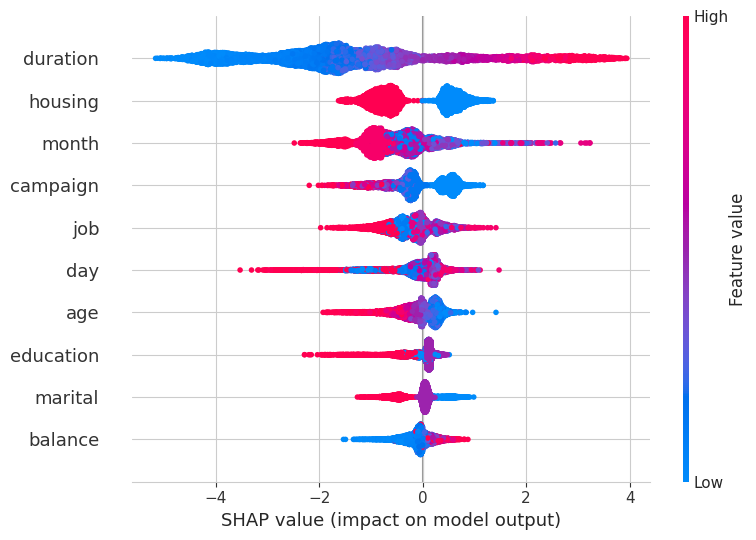

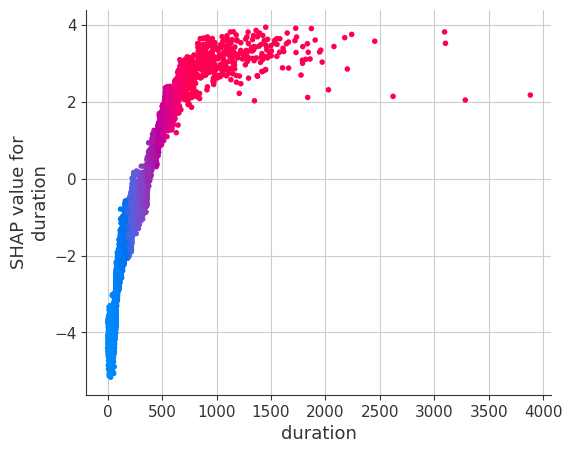

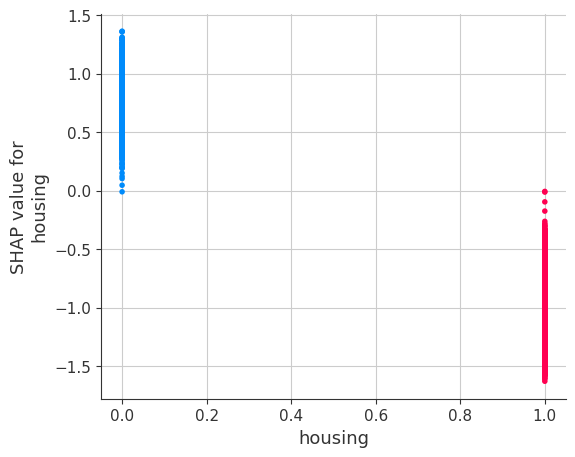

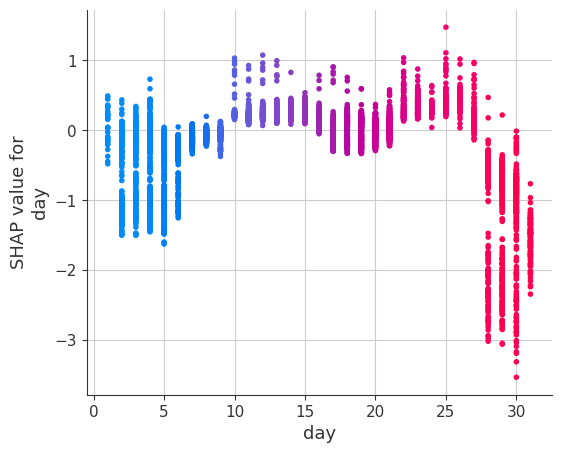

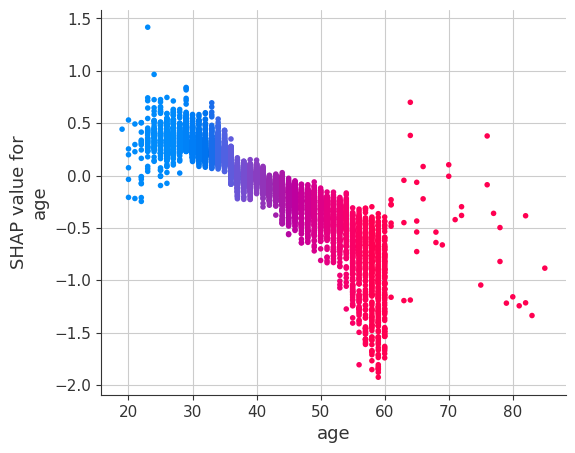

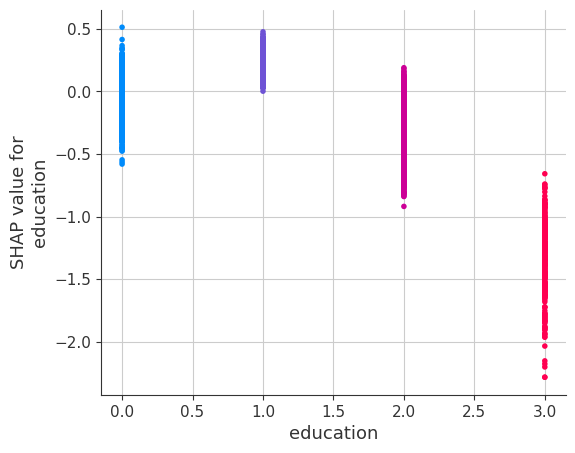

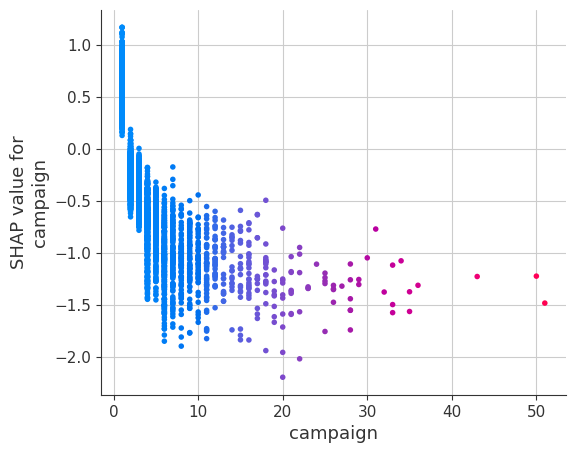

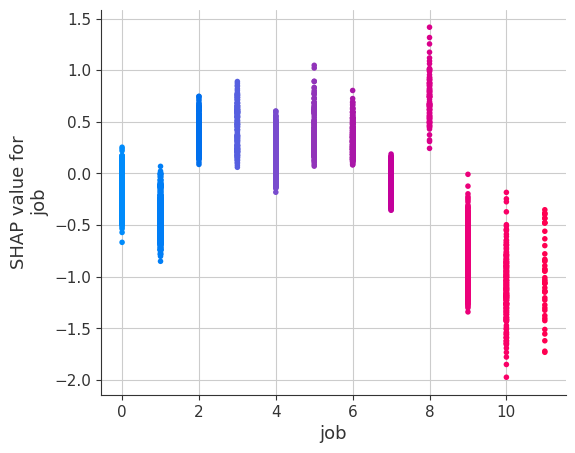

In [39]:
# Use SHAP to explain the best model's predictions

# Transform the test data using the same feature selection (10 features) used in the best model
x_test_transformed = best_model.named_steps['feature_selection'].transform(x_test)

# Create a SHAP explainer for the non-linear model
explainer = shap.TreeExplainer(best_model.named_steps['model'])

# Calculate SHAP values for the transformed test set
shap_values = explainer.shap_values(x_test_transformed)

# Visualize SHAP values

# Summary plot for global feature importance

shap.summary_plot(shap_values, x_test_transformed, feature_names=x_test.columns[best_model.named_steps['feature_selection'].get_support()])

# Dependence plot for an individual feature
# Get the features name for x_test_transformed

selected_feature_names = [x_test.columns.tolist()[i] for i in best_model.named_steps['feature_selection'].get_support(indices=True)]

# Plot the features more relevant to the target
shap.dependence_plot('duration', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="duration")

shap.dependence_plot('housing', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="housing")

shap.dependence_plot('day', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="day")

shap.dependence_plot('age', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="age")

shap.dependence_plot('education', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="education")

shap.dependence_plot('campaign', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="campaign")

shap.dependence_plot('job', shap_values, x_test_transformed, feature_names=selected_feature_names, interaction_index="job")

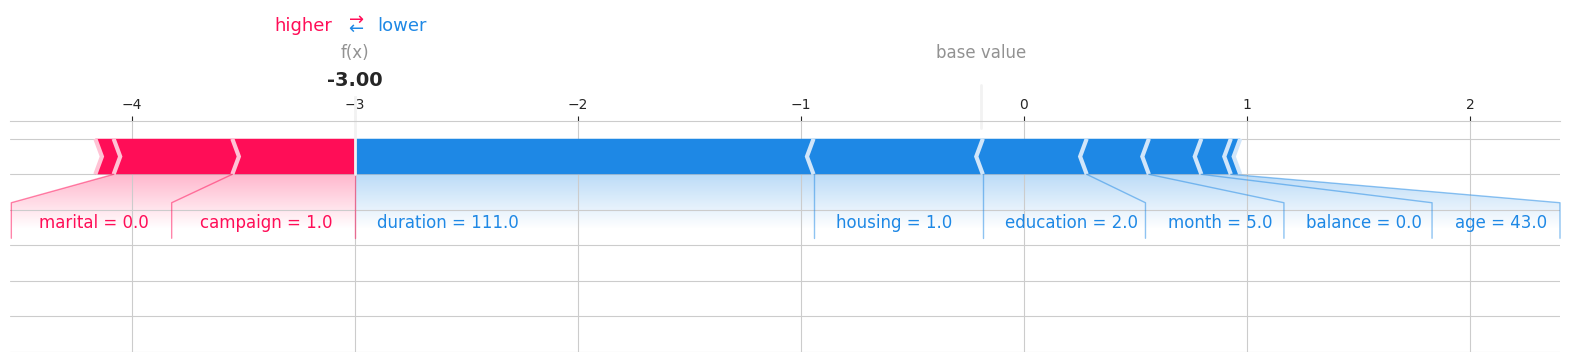

In [48]:
# Make x_test_transformed as dataframe
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=selected_feature_names)

shap.plots.force(explainer.expected_value, shap_values[0,:], x_test_transformed_df.iloc[0, :], matplotlib = True)

In the force plot showed that marital and campaign drive the negative impact to the subscription, age, account balance, last contact of month and education have contribute to the positive impact on subscription.